In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics im

from collections import defaultdict

In [2]:
dataset = pd.read_csv('housing.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BDB8550>,
      dtype=object)

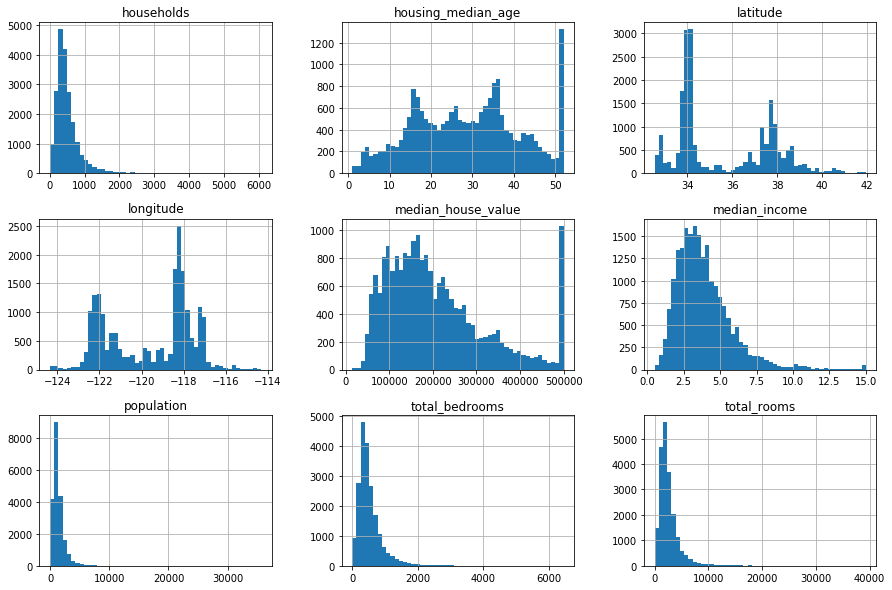

In [18]:
dataset.hist(bins=50,figsize=(15,10))

Text(0.5, 1.0, 'Distribution of households')

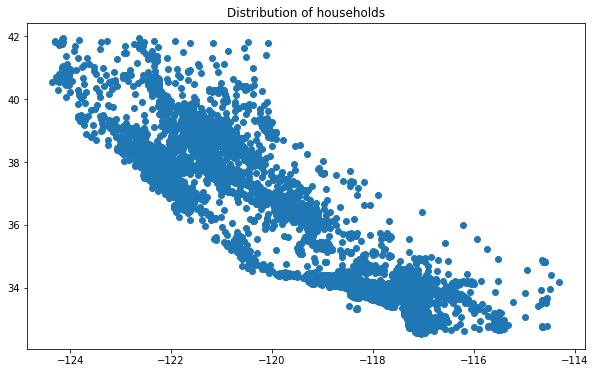

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(x=dataset['longitude'],y=dataset['latitude'])
plt.title("Distribution of households")

In [5]:
dataset['ocean_proximity'].unique()
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
dataset.sample(12, random_state = 4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6939,-118.10,33.99,36.0,1529.0,290.0,1271.0,287.0,3.6875,175200.0,<1H OCEAN
8032,-118.13,33.83,44.0,1710.0,333.0,786.0,344.0,4.2917,314700.0,<1H OCEAN
18877,-122.23,38.09,26.0,4397.0,997.0,2539.0,965.0,2.4875,90000.0,NEAR BAY
4882,-118.26,34.02,38.0,980.0,285.0,1308.0,310.0,1.5652,123100.0,<1H OCEAN
5409,-118.44,34.03,41.0,1164.0,265.0,561.0,251.0,4.2411,350900.0,<1H OCEAN
1126,-121.60,39.77,23.0,2263.0,497.0,1138.0,455.0,2.3403,87300.0,INLAND
20246,-119.26,34.27,40.0,2528.0,572.0,1318.0,549.0,3.6413,212700.0,NEAR OCEAN
15775,-122.45,37.77,52.0,3095.0,682.0,1269.0,639.0,3.5750,500001.0,NEAR BAY
11992,-117.51,33.97,35.0,352.0,62.0,184.0,57.0,3.6691,137500.0,INLAND
6043,-117.74,34.05,29.0,2452.0,700.0,3029.0,665.0,2.1354,110700.0,INLAND


Text(0.5, 1.0, 'No of houses in each location')

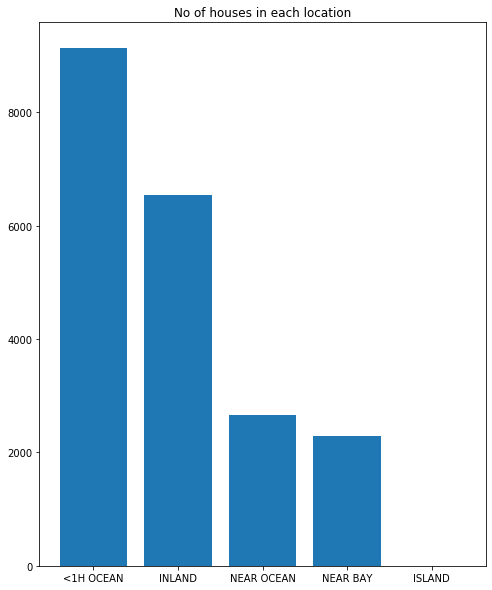

In [7]:
a = dict(dataset['ocean_proximity'].value_counts())
plt.figure(figsize=(8,10))
plt.bar(a.keys(), height=a.values())
plt.title('No of houses in each location')


Text(0.5, 1.0, 'Prices in each location')

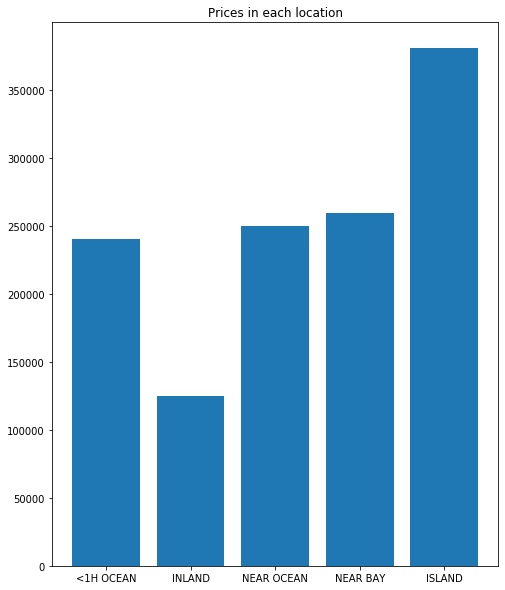

In [8]:
plt.figure(figsize=(8,10))
fn = lambda x: dataset[dataset.ocean_proximity==x]['median_house_value'].mean()
means = list(map(fn,a.keys()))
means
plt.bar(a.keys(), height=means)
plt.title('Prices in each location')

In [9]:
dataset['rooms_per_household'] = dataset['total_rooms']/dataset['households']

In [10]:
dataset.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091


In [11]:
b = dict(dataset['rooms_per_household'].value_counts())
result = defaultdict(int)
for i in b.keys():
    result[int(round(i))]+=b[i]


Text(0.5, 1.0, 'Rooms per household distribution')

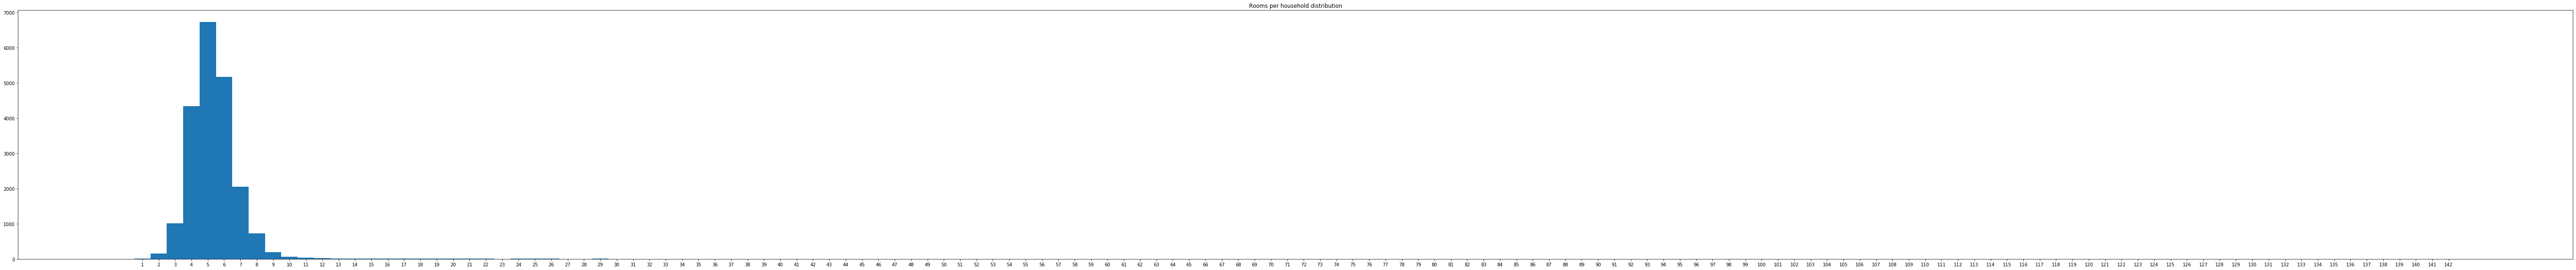

In [33]:
plt.figure(figsize=(100,10))
plt.bar(result.keys(), height=result.values(), width=1)
plt.xticks(np.arange(min(result.keys()), max(result.keys())+1, 1))
plt.title('Rooms per household distribution')

- This shows that the maximum number of houses in demand have 5 houses. So, If a property agent wants to contruct property, he should go for 5 rooms to get a buyer easily.

In [36]:
# Create mapping dictionary
ocean_codex = {}
count = 0
for i in a.keys():
    ocean_codex.setdefault(i, count)
    count+=1
# Map
dataset['num_ocean'] = dataset['ocean_proximity'].map(ocean_codex)
# View 10 random records
dataset.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,num_ocean
12554,-121.47,38.55,29.0,1303.0,308.0,861.0,263.0,1.0208,55800.0,INLAND,4.954373,1
18216,-122.07,37.39,19.0,1465.0,342.0,646.0,345.0,4.7120,289300.0,NEAR BAY,4.246377,3
19559,-120.98,37.60,36.0,1437.0,NaN,1073.0,320.0,2.1779,58400.0,INLAND,4.490625,1
15979,-122.45,37.76,31.0,5283.0,1330.0,2659.0,1269.0,3.5744,500000.0,NEAR BAY,4.163121,3
1124,-121.58,39.76,18.0,1676.0,332.0,733.0,318.0,1.7875,103800.0,INLAND,5.270440,1
4486,-118.20,34.05,8.0,762.0,204.0,728.0,174.0,2.4886,137500.0,<1H OCEAN,4.379310,0
18452,-121.78,37.24,17.0,2123.0,341.0,1067.0,339.0,6.0062,262700.0,<1H OCEAN,6.262537,0
14766,-117.10,32.58,33.0,393.0,76.0,330.0,80.0,4.1029,122700.0,NEAR OCEAN,4.912500,2
1234,-120.33,38.26,13.0,2962.0,546.0,252.0,103.0,4.4063,155800.0,INLAND,28.757282,1
14340,-117.16,32.74,49.0,1815.0,495.0,601.0,410.0,3.0571,418800.0,NEAR OCEAN,4.426829,2


In [48]:
X = np.asarray(dataset[['longitude', 'num_ocean']])
# print(len(X))
y = np.asarray(dataset['median_house_value'])
# print(len(y))

In [49]:
trainX, testX, trainy, testy = train_test_split(X,y, test_size=0.2, random_state = 4)

In [50]:
print('Number of Long-Num labels in training set {}'.format(len(trainX)))
print('Number of Price labels in training set {}'.format(len(trainy)))
print('Number of Long-Num labels in testing set {}'.format(len(testX)))
print('Number of Price labels in testing set {}'.format(len(testy)))

Number of Long-Num labels in training set 16512
Number of Price labels in training set 16512
Number of Long-Num labels in testing set 4128
Number of Price labels in testing set 4128


In [52]:
model = LinearRegression()

In [53]:
trainX

array([[-118.2 ,    0.  ],
       [-122.28,    3.  ],
       [-118.14,    0.  ],
       ...,
       [-122.23,    2.  ],
       [-118.35,    0.  ],
       [-121.89,    0.  ]])

In [54]:
model.fit(trainX, trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
predictions = model.predict(testX)

In [56]:
predictions

array([203053.23774417, 203140.58285803, 213914.63777894, ...,
       204159.60918638, 213447.30629335, 212768.45236723])

In [58]:
rmse = mean_squared_error(testy, predictions)

NameError: name 'mean_square_error' is not defined